Digite a ordem do polinômio (m): 1
Digite o número de pontos (n): 7
Digite os valores de x e y:
x[1]: 1
y[1]: 0.5
x[2]: 2
y[2]: 2.5
x[3]: 3
y[3]: 2
x[4]: 4
y[4]: 4
x[5]: 5
y[5]: 3.5
x[6]: 6
y[6]: 6
x[7]: 7
y[7]: 5.5

Coeficientes do polinômio:
a0 = 0.0714
a1 = 0.8393

Desvio padrão total (s_y): 1.9457
Erro padrão da estimativa (s_e): 0.7734
Coeficiente de determinação (R²): 0.8683
Coeficiente de correlação (r): 0.9318

Tabela de cálculo de Sr e St:
| i |   x[i]   |   y[i]   |  y_pred[i]  |   (y[i] - y_pred[i])²   |   (y[i] - mean_y)²   |
-------------------------------------------------------------------------------
|  1 |   1.0000 |   0.5000 |       0.9107 |                0.1687 |                8.5765 |
|  2 |   2.0000 |   2.5000 |       1.7500 |                0.5625 |                0.8622 |
|  3 |   3.0000 |   2.0000 |       2.5893 |                0.3473 |                2.0408 |
|  4 |   4.0000 |   4.0000 |       3.4286 |                0.3265 |                0.3265 |
|  5 |  

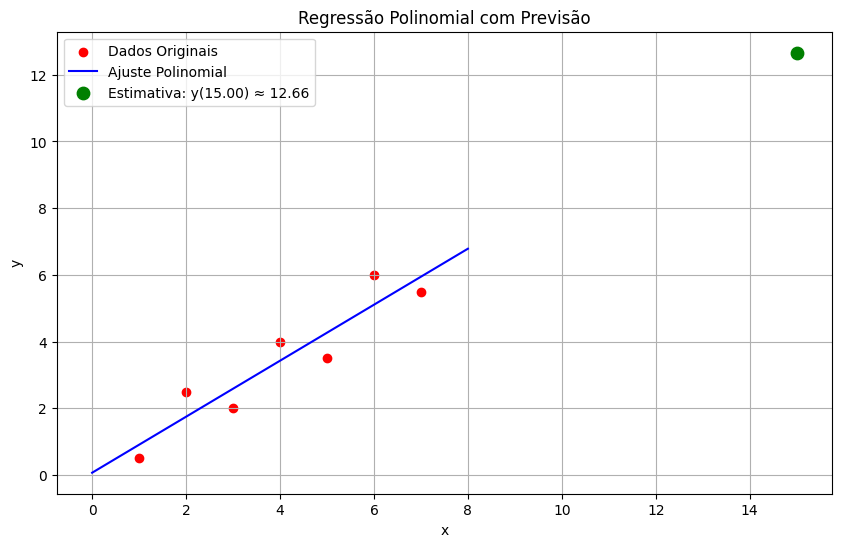

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Passo 1: Entrada da ordem do polinômio
m = int(input("Digite a ordem do polinômio (m): "))

# Passo 2: Entrada dos dados
n = int(input("Digite o número de pontos (n): "))

# Verificar se a regressão é possível
if n < m + 1:
    print("Erro: Regressão impossível, o número de pontos deve ser maior ou igual a m+1.")
    exit()

x = []
y = []
print("Digite os valores de x e y:")
for i in range(n):
    x_i = float(input(f"x[{i+1}]: "))
    y_i = float(input(f"y[{i+1}]: "))
    x.append(x_i)
    y.append(y_i)

x = np.array(x)
y = np.array(y)

# Passo 3: Construir a matriz A e o vetor B
A = np.zeros((m + 1, m + 1))
B = np.zeros(m + 1)

for i in range(m + 1):
    for j in range(m + 1):
        A[i, j] = np.sum(x ** (i + j))
    B[i] = np.sum(y * (x ** i))

# Passo 4: Resolver o sistema linear para obter os coeficientes
coef = np.linalg.solve(A, B)

# Passo 5: Avaliar o polinômio ajustado
y_pred = sum(coef[i] * x**i for i in range(m + 1))

# Soma dos quadrados dos resíduos
residuos = (y - y_pred) ** 2
SS_res = np.sum(residuos)

# Soma total dos quadrados
mean_y = np.mean(y)
total = (y - mean_y) ** 2
SS_tot = np.sum(total)

# Coeficiente de determinação (R²)
R2 = 1 - (SS_res / SS_tot)

# Desvio padrão total (dos y)
desvio_total = np.sqrt(SS_tot / (n - 1))

# Erro padrão da estimativa
n_params = m + 1
erro_padrao = np.sqrt(SS_res / (n - n_params))

# Coeficiente de correlação
if m == 1:
    r = np.corrcoef(x, y)[0, 1]
else:
    r = np.sqrt(R2)

# Saída dos coeficientes
print("\nCoeficientes do polinômio:")
for i, c in enumerate(coef):
    print(f"a{i} = {c:.4f}")

# Exibir métricas
print(f"\nDesvio padrão total (s_y): {desvio_total:.4f}")
print(f"Erro padrão da estimativa (s_e): {erro_padrao:.4f}")
print(f"Coeficiente de determinação (R²): {R2:.4f}")
print(f"Coeficiente de correlação (r): {r:.4f}")

# Tabela Sr e St
print("\nTabela de cálculo de Sr e St:")
print("| i |   x[i]   |   y[i]   |  y_pred[i]  |   (y[i] - y_pred[i])²   |   (y[i] - mean_y)²   |")
print("-" * 79)
for i in range(n):
    print(f"| {i+1:2d} | {x[i]:8.4f} | {y[i]:8.4f} | {y_pred[i]:12.4f} | {residuos[i]:21.4f} | {total[i]:21.4f} |")
print("-" * 79)
soma_y = np.sum(y)
print(f"Somatórios:                      | {SS_res:21.4f} | {SS_tot:21.4f} |")
print(f"Soma dos y[i]: {soma_y:.4f}")

# Previsão de y para valor fornecido de x
x_novo = float(input("\nDigite o valor de x para prever y: "))
y_novo = sum(coef[i] * x_novo**i for i in range(m + 1))
print(f"Estimativa: y({x_novo}) ≈ {y_novo:.6f}")

# Gráfico
x_fit = np.linspace(min(x) - 1, max(x) + 1, 500)
y_fit = sum(coef[i] * x_fit**i for i in range(m + 1))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Dados Originais')
plt.plot(x_fit, y_fit, color='blue', label='Ajuste Polinomial')
plt.scatter(x_novo, y_novo, color='green', s=80, zorder=5,
            label=f'Estimativa: y({x_novo:.2f}) ≈ {y_novo:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressão Polinomial com Previsão')
plt.legend()
plt.grid()
plt.show()
